# Batch Code Run (Saved State)

### Data Location

In [1]:
from __future__ import division, unicode_literals, print_function
from settings3_tp import *

In [2]:
newdata='/Volumes/MINI-DRIVE/Microchannel_Flow_Data/Flow_Behavior_Analysis/20180603/Data_201_x-2mm_FeNGO-Roses_C2e-1mg_mL_Q_5e-4ml_min_Z70/Data201_processed_BG_474.tif'
path=os.path.dirname(newdata)#Used to Save Files in appropriate location

## Save the notebook after analysis

In [57]:
! jupyter nbconvert --to html 'Data201' --output ./Data201_10thJune_4pm

[NbConvertApp] Converting notebook Data201.ipynb to html
[NbConvertApp] Writing 3159145 bytes to ./Data201_10thJune_4pm.html


In [3]:
# Workable code for Repeated Data
import logging 
logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)

%matplotlib inline

mpl.rc('figure', figsize=(10,5))
mpl.rc('image', cmap='gray')


from pims import TiffStack
output_in_cell = sys.stdout
from time import localtime, strftime
current_time = strftime("%Y-%m-%d_%H-%M-%S", localtime())
logpath=os.path.join(path,current_time+'.log')

### Import MultiImage Tiff file

In [4]:
frames = TiffStack(filename=newdata)

In [9]:
print(current_time,file=open(logpath,'w'))

In [36]:
frames

<Frames>
Source: /Volumes/MINI-DRIVE/Microchannel_Flow_Data/Flow_Behavior_Analysis/20180603/Data_201_x-2mm_FeNGO-Roses_C2e-1mg_mL_Q_5e-4ml_min_Z70/Data201_processed_BG_474.tif
Length: 10000 frames
Frame Shape: (512, 512)
Pixel Datatype: uint8

In [11]:
print(frames,file=open(logpath,'w'))

### TP Algorithm

## Choose the settings from Single Image Analysis before proceeding

In [5]:
tp_data = os.path.join(path,'data_frames.h5')# Change to path
tp_data

'/Volumes/MINI-DRIVE/Microchannel_Flow_Data/Flow_Behavior_Analysis/20180603/Data_201_x-2mm_FeNGO-Roses_C2e-1mg_mL_Q_5e-4ml_min_Z70/data_frames.h5'

In [6]:
if os.path.isfile(tp_data):print('Warning!!!: \nData overwrite possible \nWarning!!!:') 

Warning!!!: 
Data overwrite possible 
Warning!!!:


In [14]:
from shutil import copyfile
src = tp_data
dst = os.path.join(path, current_time+'_1to1000_data_frames.h5')
copyfile(src, dst)

'/Volumes/MINI-DRIVE/Microchannel_Flow_Data/Flow_Behavior_Analysis/20180603/Data_201_x-2mm_FeNGO-Roses_C2e-1mg_mL_Q_5e-4ml_min_Z70/2018-06-07_01-27-42_1to1000_data_frames.h5'

## Run this ONLY once

In [15]:
# Only first 1000 frames
with tp.PandasHDFStore(tp_data) as s:
    tp.batch(frames[:],39,invert=False, minmass=8000,percentile=64, 
              preprocess=True, separation=20,
             noise_size=1, smoothing_size=None, threshold=50,
              topn=15, max_iterations=10, output=s,)

Frame 9999: 15 features


In [16]:
## Write this data to logfile
print('''TP Batch Settings:
            tp.batch(frames[:],39,invert=False, minmass=8000,percentile=64, 
              preprocess=True, separation=20,
             noise_size=1, smoothing_size=None, threshold=50,
              topn=15, max_iterations=10, output=s,)''', file=open(logpath,'a'))

## Link TP Data

In [17]:
#t = tp.link_df(f,50,memory=10)
with tp.PandasHDFStore(tp_data) as sp:
    for linked in tp.link_df_iter(sp,[20,50],memory=50):
        sp.put(linked)

Frame 9999: 15 trajectories present.


In [18]:
## Write this data to logfile
print('''
      TP Link Settings:
      with tp.PandasHDFStore(tp_data) as sp:
        for linked in tp.link_df_iter(sp,[20,50],memory=50):
        sp.put(linked)''', file=open(logpath,'a'))

In [7]:
with tp.PandasHDFStore(tp_data) as sp:
    trajectories_tp = pd.concat(iter(sp))

In [10]:
refer=962
trajectories_tp[trajectories_tp['frame']==refer]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
27,126.981306,258.820805,74136.021825,10.832831,0.191446,138.589767,207096.0,0.041175,962,647
40,154.002003,483.349465,15022.338756,14.046938,0.689655,199.569264,58515.0,0.194887,962,648
61,259.215292,53.496424,52708.460028,12.805977,0.253256,112.455696,242938.0,0.034593,962,649
72,340.876618,483.444352,75483.114356,12.063020,0.103861,125.126761,237808.0,0.035403,962,642
83,379.467529,448.411190,73094.618722,12.140021,0.102169,120.375112,244990.0,0.034280,962,630
85,397.117698,51.933849,9110.495285,6.560957,0.520202,201.945088,45930.0,0.285007,962,628


## Compare Trajectory Output

In [13]:
t2=tp.filter_stubs(trajectories_tp,5)
print('TP Trajectories')
print('Before:', trajectories_tp['particle'].nunique())
print('After:', t2['particle'].nunique())

TP Trajectories
Before: 3796
After: 2739


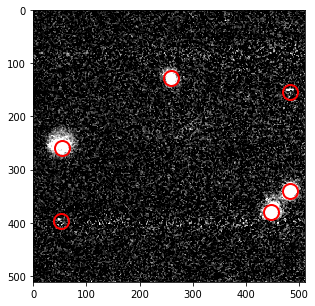

In [12]:
plt.figure()
tp.annotate(t2[t2['frame'] == refer], frames[refer]);

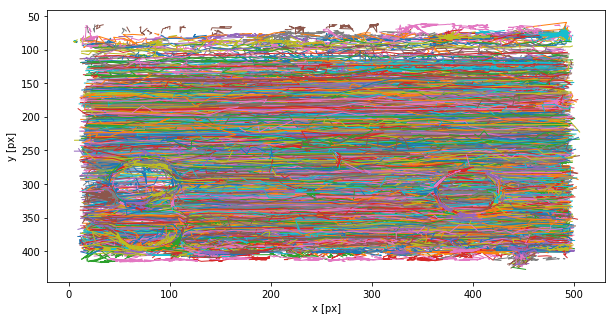

In [13]:
trj1, trax1 = plt.subplots()
#tp.plot_traj(t1)
tp.plot_traj(t2);
#trj.savefig('1_3157_lessthan 9 frame trajectories.jpg')
plt.close()

In [17]:
particle_density = pd.DataFrame(t2[['particle','x','y']])
grouped = particle_density.groupby(['particle'])
#agg = grouped.aggregate(np.mean)
agg = grouped.aggregate(np.median)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c245927b8>,
      dtype=object)

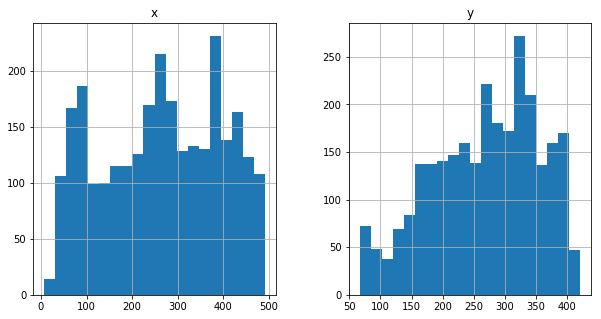

In [18]:
agg.hist(bins=20)

## Hough Data: To do later

## Run this ONLY once

## Diagnostics

## Final Output

## Smoothen Trajectories

In [16]:
t2_smooth=trajectories_tp.groupby('particle').apply(median_smooth_trajectory)

In [17]:
t2_smooth = t2_smooth.reset_index(drop=True)

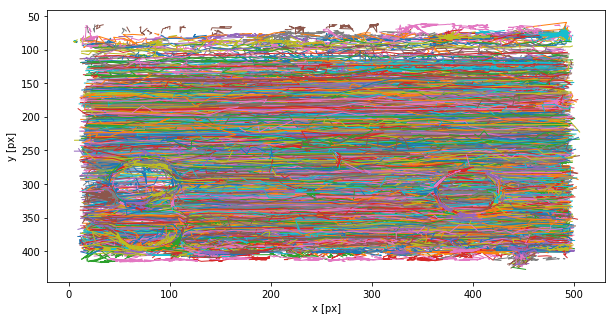

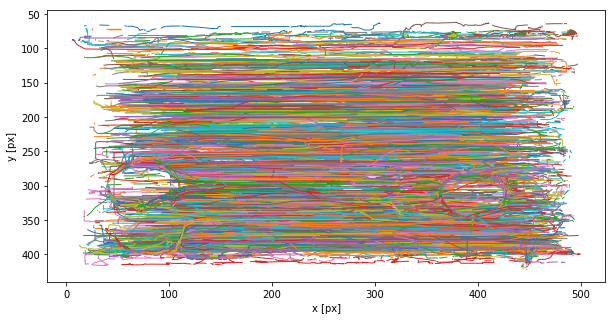

In [18]:
tp.plot_traj(t2)#.groupby('particle').filter(lambda x: single_traj_angle(x) > 70 and tp.diagonal_size(x)>100))
tp.plot_traj(t2_smooth)#.groupby('particle').filter(lambda x: single_traj_angle(x) > 70 and tp.diagonal_size(x)>100))

## Plot of Angle vs/ Distance

In [19]:
t2_traj_info=pd.DataFrame()
t2_traj_info['angle'] = pd.DataFrame(t2.groupby('particle').agg(smoothened_single_traj_angle).x)
t2_traj_info['length'] = pd.DataFrame(t2.groupby('particle').agg(tp.diagonal_size).x)

Text(0.5,1,'Trajectory Distribution')

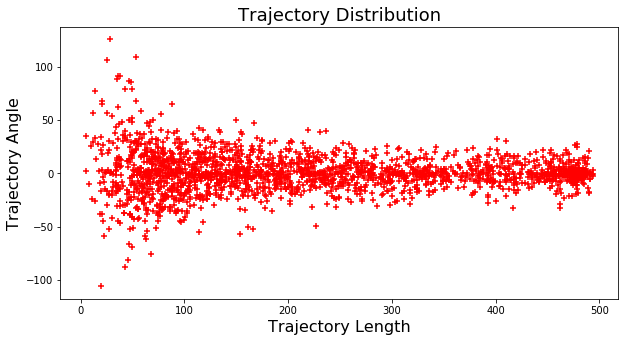

In [65]:
plt.scatter(t2_traj_info.length,t2_traj_info.angle,marker='+',color='r')#  "#3F5D7D")
plt.xlabel('Trajectory Length',fontsize=16)
plt.ylabel('Trajectory Angle',fontsize=16)
plt.title('Trajectory Distribution',fontsize=18)

In [60]:
t2_traj_info=pd.DataFrame()
t2_traj_info['angle'] = pd.DataFrame(t2.groupby('particle').agg(single_traj_angle).x)
t2_traj_info['length'] = pd.DataFrame(t2.groupby('particle').agg(tp.diagonal_size).x)

Text(0.5,1,'Smoothened Trajectory Distribution')

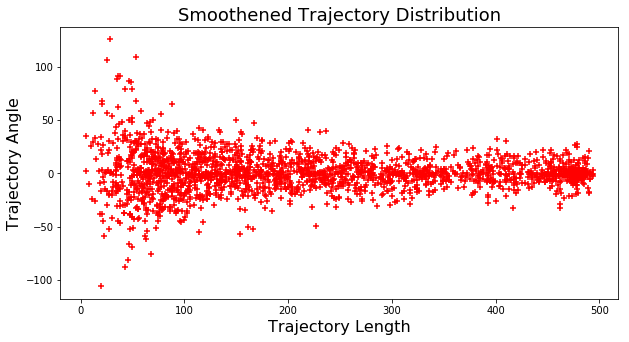

In [69]:
fig,ax = plt.subplots()
ax.scatter(t2_traj_info.length,t2_traj_info.angle,marker='+',color='r')
plt.xlabel('Trajectory Length',fontsize=16)
plt.ylabel('Trajectory Angle',fontsize=16)
plt.title('Smoothened Trajectory Distribution',fontsize=18)

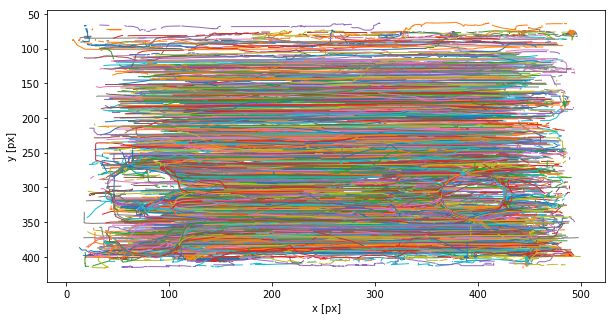

In [86]:
tp.plot_traj(t2_smooth.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50))

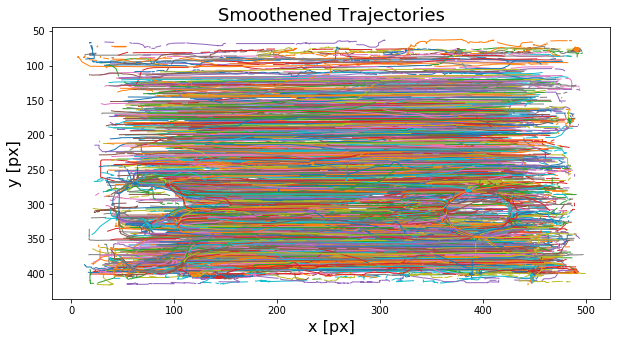

In [92]:
plt.figure(figsize=(10, 5))  
  
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)
plt.xlabel('x[px]',fontsize=16)
plt.ylabel('y[px]',fontsize=16)
plt.title('Smoothened Trajectories',fontsize=18)
tp.plot_traj(t2_smooth.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50),
            ax=ax)

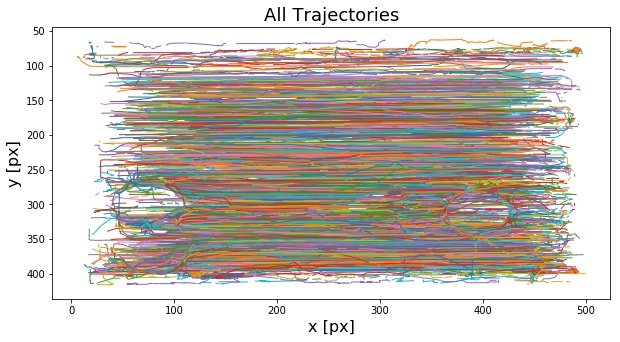

In [108]:
plt.figure(figsize=(10, 5))  
  
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)
plt.xlabel('x[px]',fontsize=16)
plt.ylabel('y[px]',fontsize=16)
plt.title('All Trajectories',fontsize=18)
tp.plot_traj(t2_smooth.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50),
            ax=ax)

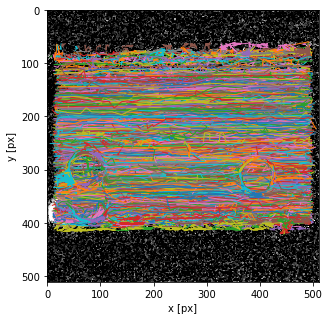

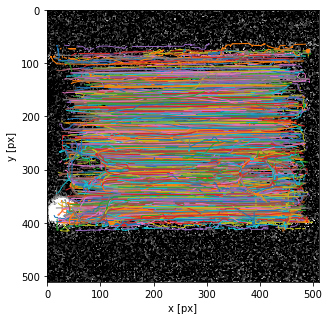

In [22]:
tp.plot_traj(t2.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50),superimpose=frames[1000])
tp.plot_traj(t2_smooth.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50),superimpose=frames[1000])

## Particle Density

In [94]:
smooth_tjs = t2_smooth.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50)
particle_density = pd.DataFrame(smooth_tjs[['particle','x','y']])
grouped = particle_density.groupby(['particle'])
#agg = grouped.aggregate(np.mean)
agg = grouped.aggregate(np.median)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1dd87a6ac8>,
      dtype=object)

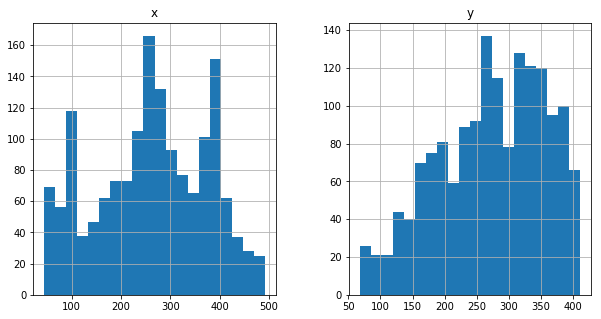

In [95]:
agg.hist(bins=20)

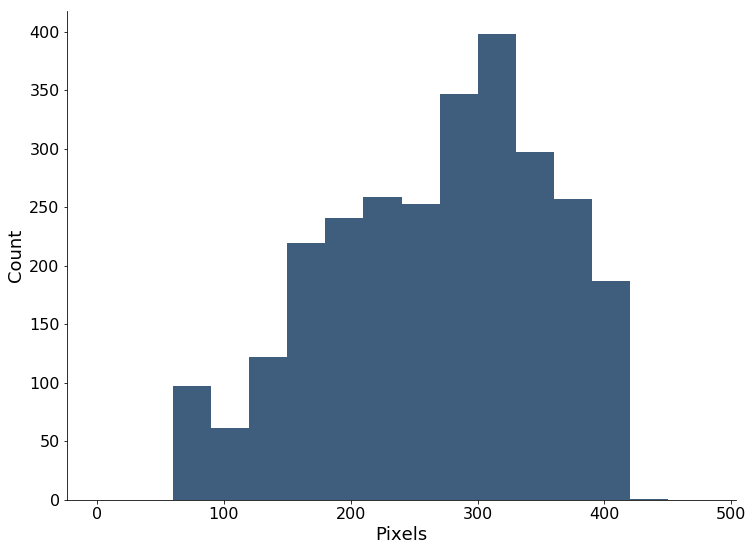

In [49]:
plt.figure(figsize=(12, 9))  
  
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Pixels", fontsize=18)  
plt.ylabel("Count", fontsize=18)  
  
# Plot the histogram. Note that all I'm passing here is a list of numbers.  
# matplotlib automatically counts and bins the frequencies for us.  
# "#3F5D7D" is the nice dark blue color.  
# Make sure the data is sorted into enough bins so you can see the distribution.  
ax.hist(agg.y, color="#3F5D7D", bins=range(0,500,30)) 
plt.show()

## TP Default Plot: Mass vs Size

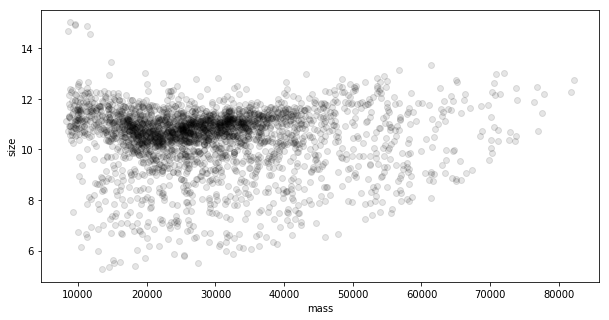

In [25]:
plt.figure()
tp.mass_size(t2.groupby('particle').mean()); 

In [26]:
## Plot Density Profile as a function of time

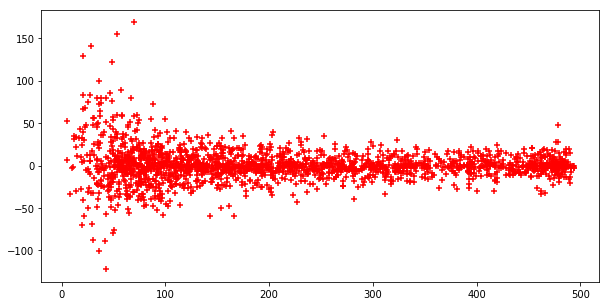

In [27]:
t2_traj_info=pd.DataFrame()
t2_traj_info['angle'] = pd.DataFrame(t2.groupby('particle').agg(smoothened_single_traj_angle).x)
t2_traj_info['length'] = pd.DataFrame(t2.groupby('particle').agg(tp.diagonal_size).x)
plt.scatter(t2_traj_info.length,t2_traj_info.angle,marker='+',color='r')

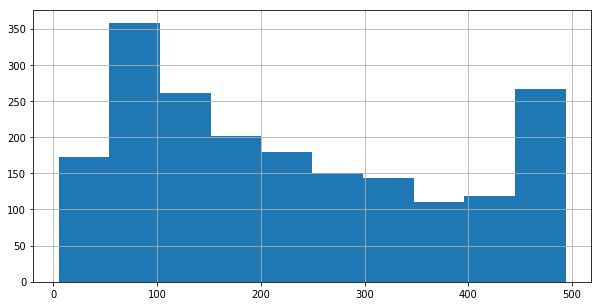

In [28]:
t2_traj_info['length'].hist()

## Plotting 1000 frames each: Particle Density Distribution

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


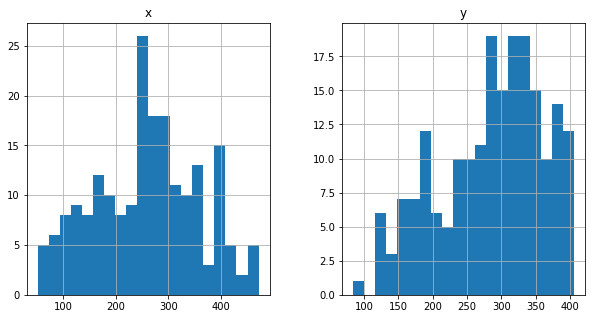

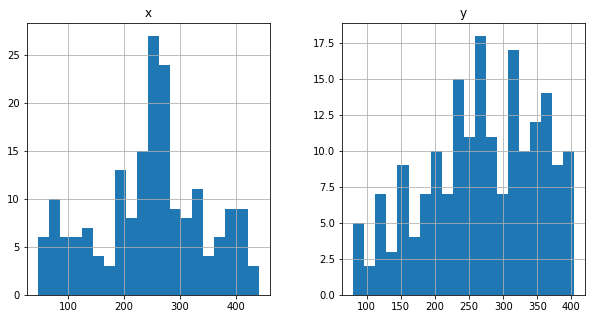

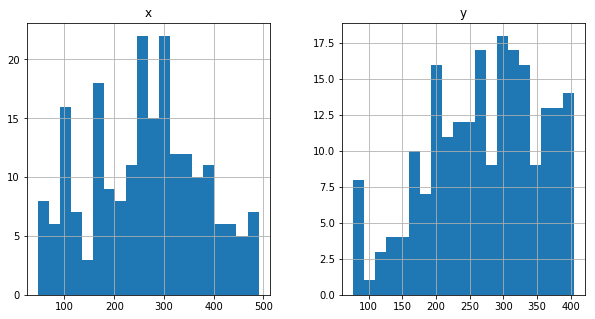

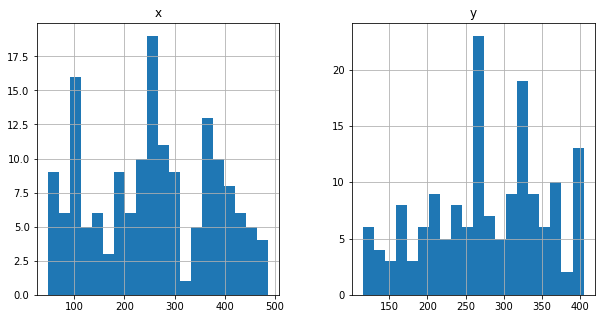

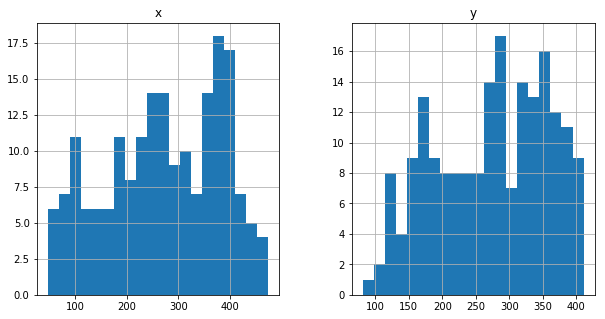

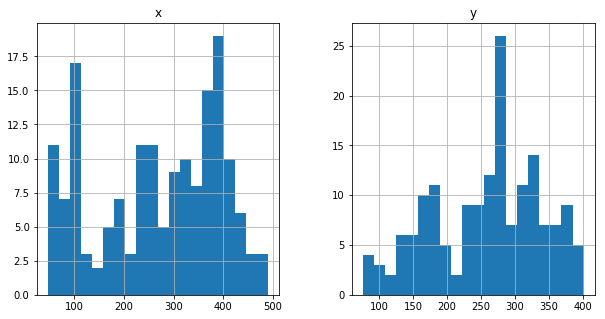

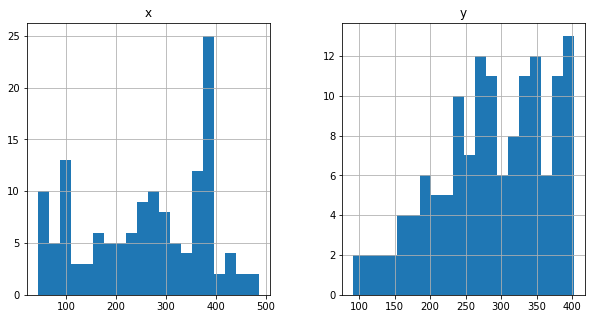

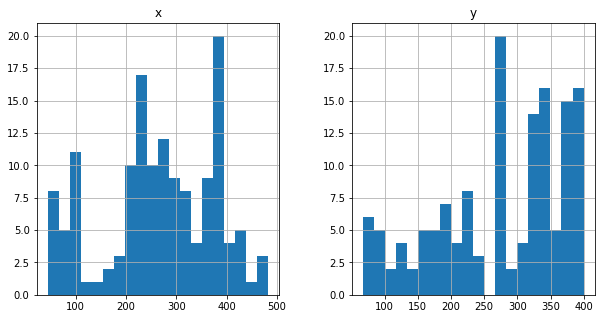

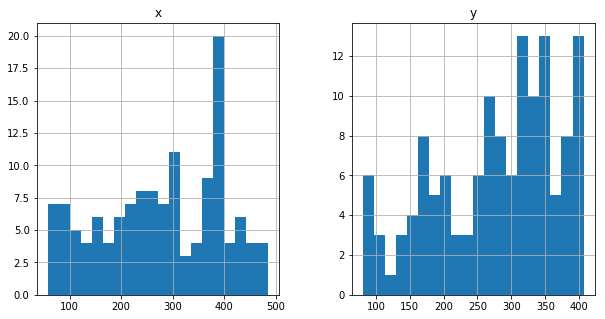

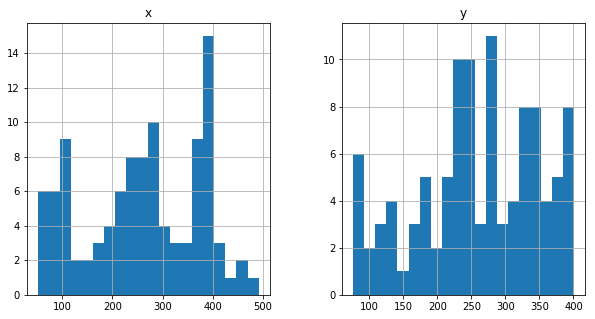

In [29]:
for step in range(0,10000,1000):
    print(step)
    t2_1 =  t2_smooth[(t2_smooth.frame < step+1000) & (t2_smooth.frame >step)]
    smooth_tjs = t2_1.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50)
    particle_density = pd.DataFrame(smooth_tjs[['particle','x','y']])
    #agg = grouped.aggregate(np.mean)
    agg = particle_density.groupby(['particle']).aggregate(np.median)
    agg.hist(bins=20)

In [30]:
# Just plot Velocity and Brightness as a function of x,y grid and then sum as trajectories??

## Plotting 1000 frames each: Particle Density Distribution

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


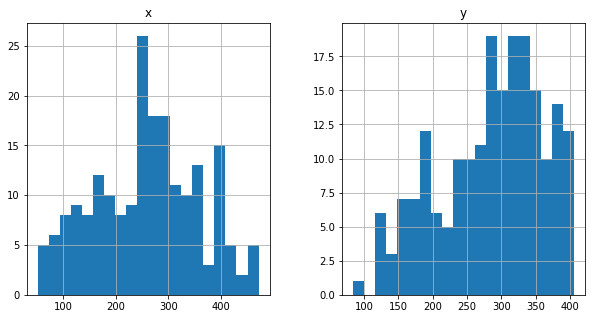

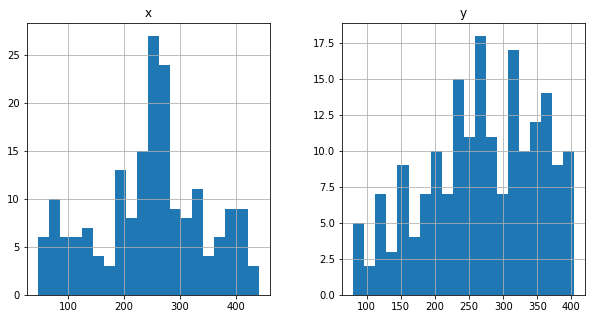

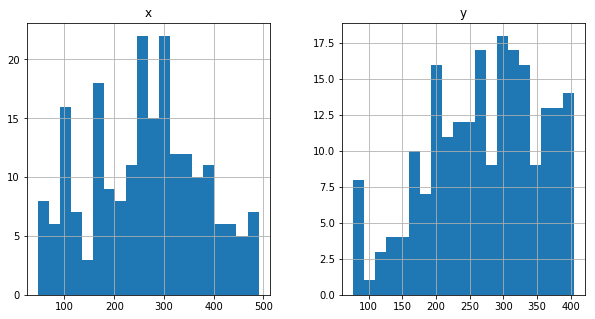

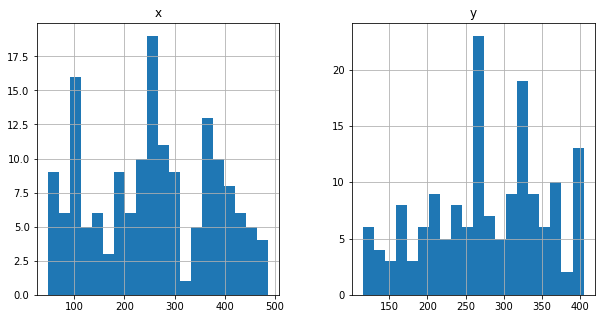

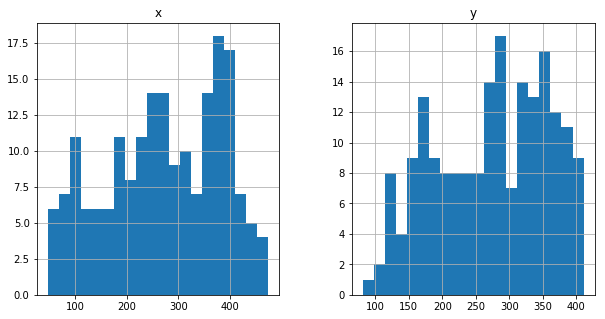

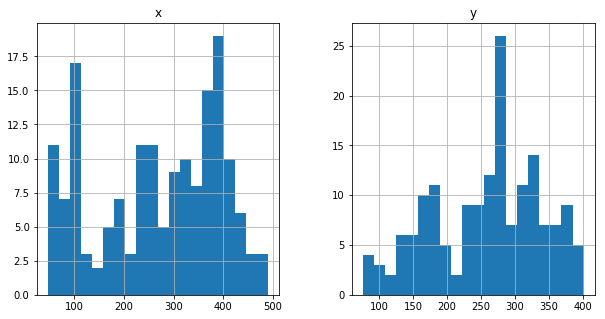

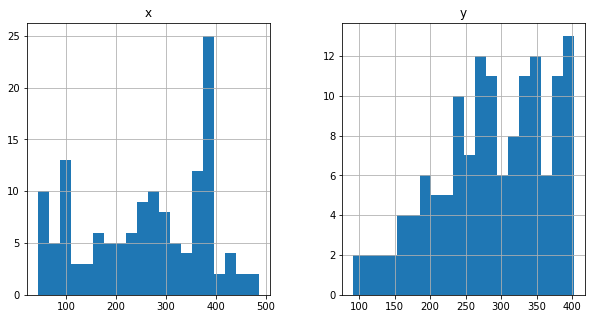

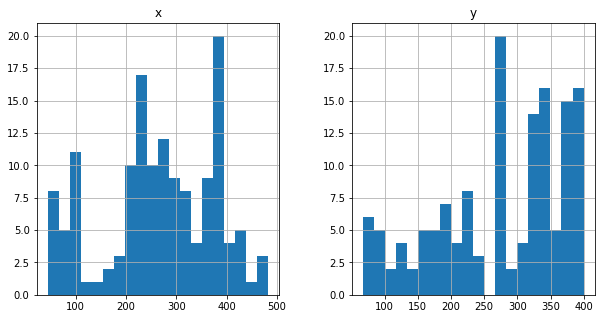

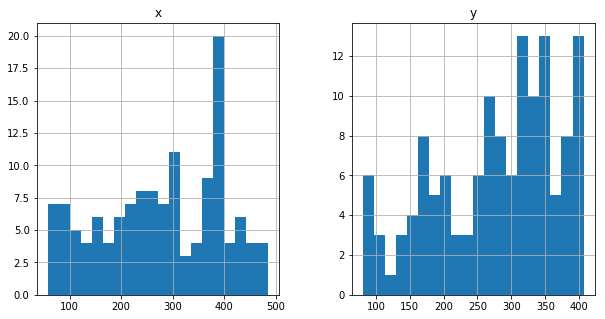

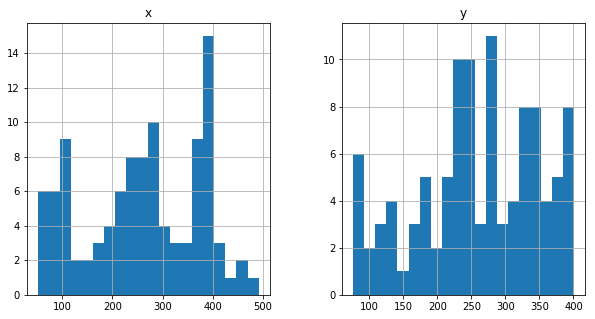

In [31]:
for step in range(0,len(frames),1000):
    print(step)
    t2_1 =  t2_smooth[(t2_smooth.frame < step+1000) & (t2_smooth.frame >step)]
    smooth_tjs = t2_1.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 70 and tp.diagonal_size(x)>50)
    particle_density = pd.DataFrame(smooth_tjs[['particle','x','y']])
    #agg = grouped.aggregate(np.mean)
    agg = particle_density.groupby(['particle']).aggregate(np.median)
    agg.hist(bins=20)

## Quantitative Margination Rate

In [56]:
min_mass =  np.min(t2.mass)
avg_mass = np.median(t2.mass)
print(min_mass, avg_mass)
n=100
first_image = avg_frames(frames[1:n])
last_image = avg_frames(frames[-n:])
exposure_time = 30.53 #in miliseconds
total_time = (len(frames)-n)*exposure_time*1e-3

#(total_no_of_frames*avg_mass)
marg_per_s = (np.sum(cv2.subtract(last_image,first_image)))/(total_time)
normalized_marg = marg_per_s/min_mass
print(normalized_marg,marg_per_s, total_time)
print("If avg mass of:",avg_mass,"then:",marg_per_s/avg_mass)

8000.123225804669 20582.316204692615
2.608791748353643 20870.655457291552 302.247
If avg mass of: 20582.316204692615 then: 1.014009077002383


In [109]:
marg_per_s = 262144*(np.sum(last_image)/262144-np.sum(first_image)/262144)/(avg_mass*total_time)
marg_per_s, total_time

(0.9557740182628888, 302.247)

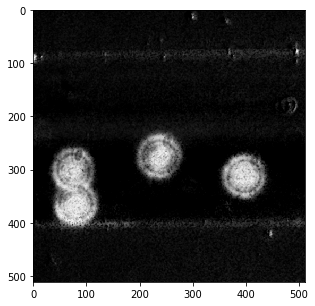

In [52]:
plt.imshow(cv2.subtract(last_image,first_image))

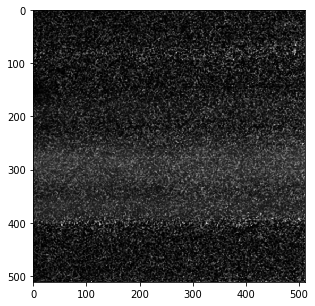

In [53]:
plt.imshow(first_image)

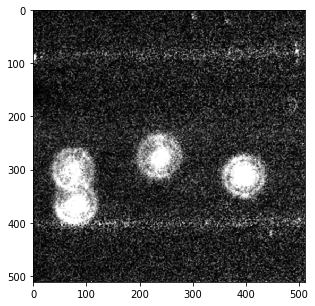

In [54]:
plt.imshow(last_image)

In [98]:
##

In [101]:
t2_particles = t2.set_index('particle')

In [105]:
t2_particles.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
particle,,,,,,,,,
0,247.952826,440.352457,35714.844383,8.361105,0.395473,180.667843,111051.0,0.079184,0
0,248.731445,462.315295,40118.910865,8.400275,0.388358,176.704763,122089.0,0.065877,1
0,248.319809,486.269229,42271.275310,9.672893,0.537623,183.141771,117060.0,0.069857,2
1,76.735262,488.779063,8121.713029,9.483721,0.149114,147.667510,35410.0,0.352500,3
2,228.951809,39.477412,12161.719087,4.693459,0.472801,183.375022,37894.0,0.353051,4


In [106]:
def get_vel(df):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-106-22c8207c135e>, line 2)

In [119]:
tsp = t2.set_index('particle')

In [120]:
tsp.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
particle,,,,,,,,,
0,247.952826,440.352457,35714.844383,8.361105,0.395473,180.667843,111051.0,0.079184,0
0,248.731445,462.315295,40118.910865,8.400275,0.388358,176.704763,122089.0,0.065877,1
0,248.319809,486.269229,42271.275310,9.672893,0.537623,183.141771,117060.0,0.069857,2
1,76.735262,488.779063,8121.713029,9.483721,0.149114,147.667510,35410.0,0.352500,3
2,228.951809,39.477412,12161.719087,4.693459,0.472801,183.375022,37894.0,0.353051,4


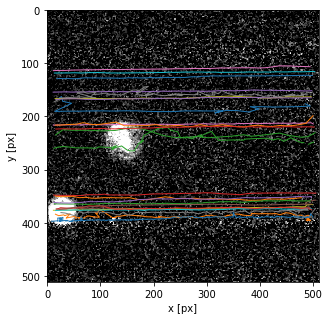

In [130]:
tp.plot_traj(t2.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 2 and tp.diagonal_size(x)>480),superimpose=frames[1000])

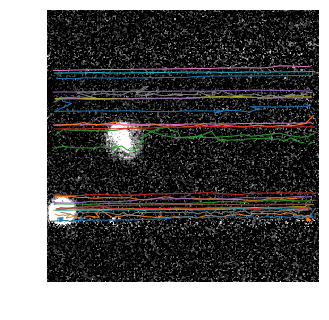

In [132]:
fig,ax = plt.subplots()
plt.axis('off')
tp.plot_traj(t2.groupby('particle').filter(lambda x: abs(single_traj_angle(x)) < 2 and tp.diagonal_size(x)>480),superimpose=frames[1000])

In [ ]:
class RecentVelocityPredict(NullPredict):
    def __init__(self, span=1):
        """Use the 'span'+1 most recent frames to make a velocity field."""
        self.recent_frames = deque([], span + 1)
    def compute_velocities(self, frame):
            """Compute velocity field based on a newly-tracked frame."""
            pframe = frame.set_index('particle')
            self.recent_frames.append(pframe)
            if len(self.recent_frames) == 1:
                # Double the first frame. Velocity field will be zero.
                self.recent_frames.append(pframe)
                dt = 1. # Avoid dividing by zero
            else: # Not the first frame
                dt = float(self.recent_frames[-1][self.t_column].values[0] -
                     self.recent_frames[0][self.t_column].values[0])

            # Compute velocity field
            disps = self.recent_frames[-1][self.pos_columns].join(
                self.recent_frames[-1][self.pos_columns] -
                    self.recent_frames[0][self.pos_columns], rsuffix='_disp_').dropna()
            positions = disps[self.pos_columns]
            vels = disps[[cn + '_disp_' for cn in self.pos_columns]] / dt
            # 'vels' will have same column names as 'positions'
            vels = vels.rename(columns=lambda n: n[:-6])
            return dt, positions, vels


20

## Export Unsmoothened Unfiltered Histogram Data

In [ ]:
particle_density = pd.DataFrame(t2[['particle','x','y']])
grouped = particle_density.groupby(['particle'])
#agg = grouped.aggregate(np.mean)
agg = grouped.aggregate(np.median)

In [ ]:
hx,hy=np.histogram(a=agg.y,bins=range(0,500,30))

df = pd.DataFrame([hx,hy]).T

df.to_csv('Data201_hist.csv')